In [1195]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

load_dotenv()

AVES_ROOT = Path(os.environ['AVES_ROOT'])

DATA_PATH = AVES_ROOT / "data" / "external" / "hito"
PROCESSED_PATH = AVES_ROOT / "data" / "processed"
EOD_PATH = AVES_ROOT / "data" / "external" / "EOD_STGO"

In [1196]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd

from aves.data import eod
from aves.features.utils import normalize_rows, normalize_columns
from aves.config import setup_style

setup_style()
os.getcwd()


'/home/ksmnt/Universidad/CC5208/aves/notebooks/vis-course/2024-otoño'

In [1197]:

ciclovias_2021 = gpd.read_file(DATA_PATH / "Evaluación_de_la_Red_de_Ciclovías_del_Gran_Santiago_según_el_Decreto_102.geojson" )
df_2021_sin = gpd.read_file( DATA_PATH / "siniestros_bicicletas" / "geojson" / "Siniestros_con_participación_de_bicicletas,_RM_Chile,_2021..geojson")

In [1198]:
ciclovias_2021.head()

,FID,OBJECTID,COMUNA,CICLOVIA_N,Shape_Leng,Recomendad,Singularid,Shape__Length,geometry
0,1,1,CERRILLOS,5,4512.098306,Reprobado,Reprobado,5420.466046,"MULTILINESTRING ((-70.72208 -33.51022, -70.722..."
1,2,2,CERRILLOS,5,1283.491532,Reprobado,Reprobado,1540.548491,"MULTILINESTRING ((-70.69357 -33.48135, -70.693..."
2,3,3,CERRO NAVIA,14,1395.508780,Reprobado,Aprobado,1678.401135,"LINESTRING (-70.73033 -33.42368, -70.73035 -33..."
3,4,4,CERRO NAVIA,106,1042.013708,Aprobado,Aprobado,1247.651643,"LINESTRING (-70.73303 -33.41365, -70.73199 -33..."
4,5,5,CERRO NAVIA,251,1947.337029,Aprobado,Aprobado,2331.621926,"LINESTRING (-70.71743 -33.42189, -70.71671 -33..."


<Axes: >

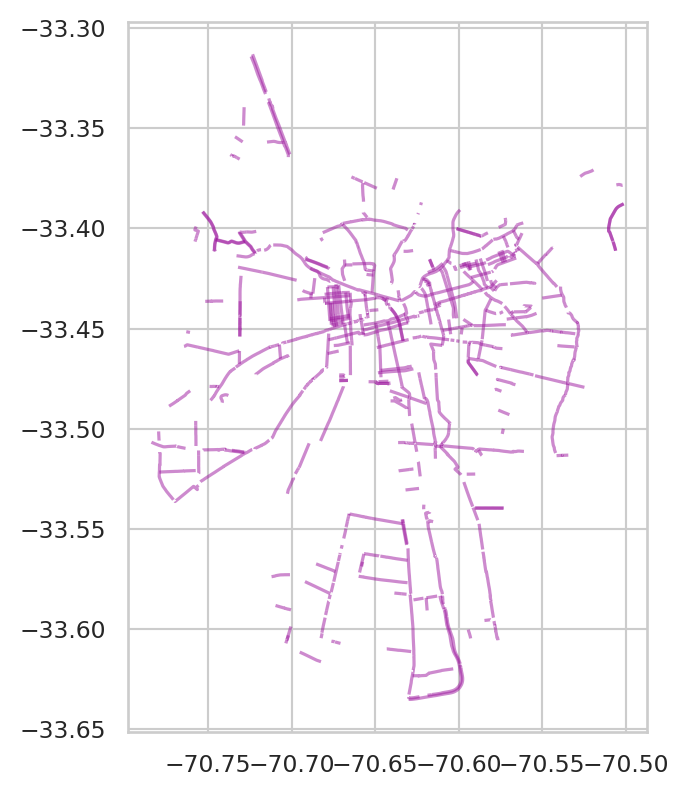

In [1199]:
ciclovias_2021.plot(markersize=1, marker='.', alpha=0.5)

In [1200]:
df_2021_sin["Gravedad"] = (
    df_2021_sin["Fallecidos"] * 10 + 
     df_2021_sin["Graves"] * 5 + 
      df_2021_sin["Menos_Grav"] * 3 + 
       df_2021_sin["Leves"] * 2 +
        df_2021_sin["Ilesos"] 

)
df_2021_sin.head()

,FID,POINT_X,POINT_Y,REGION,COD_COMUN,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,...,Zona,Cód_Calle,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,Siniestros,geometry,Gravedad
0,1,-70.661481,-33.527418,REGION METROPOLITANA,13109,LA CISTERNA,GRAN AVDA JOSE MIGUEL CARRERA,EL PARRON,0,"GRAN AVDA JOSE MIGUEL CARRERA & EL PARRON, LA ...",...,URBANA,131090158,0,0,0,1,1,1,POINT (-70.66148 -33.52742),3
1,2,-70.661464,-33.377013,REGION METROPOLITANA,13104,CONCHALI,GRAL GAMBINO,POMAIRE,0,"GRAL GAMBINO & POMAIRE, CONCHALI",...,URBANA,131040311,0,0,1,0,0,1,POINT (-70.66146 -33.37701),3
2,3,-70.661006,-33.489913,REGION METROPOLITANA,13130,SAN MIGUEL,SALESIANOS,JOSE JOAQUIN PRIETO VIAL,0,"SALESIANOS & JOSE JOAQUIN PRIETO VIAL, SAN MIGUEL",...,URBANA,131300248,0,0,0,1,1,1,POINT (-70.66101 -33.48991),3
3,4,-70.660809,-33.406061,REGION METROPOLITANA,13108,INDEPENDENCIA,INDEPENDENCIA,STA LAURA,0,"INDEPENDENCIA & STA LAURA, INDEPENDENCIA",...,URBANA,131080174,0,0,0,1,0,1,POINT (-70.66081 -33.40606),2
4,5,-70.660770,-33.446015,REGION METROPOLITANA,13101,SANTIAGO,MANUEL RODRIGUEZ,LIBER BERNARDO O'HIGGINS,0,"MANUEL RODRIGUEZ & LIBER BERNARDO O'HIGGINS, S...",...,URBANA,131010391,0,0,1,0,1,1,POINT (-70.66077 -33.44601),4


Crear los puntos en donde esta la persona

In [1201]:
df_2021_sin.head()

,FID,POINT_X,POINT_Y,REGION,COD_COMUN,COMUNA,CALLE_UNO,CALLE_DOS,NUMERO,DIR_GEOCOD,...,Zona,Cód_Calle,Fallecidos,Graves,Menos_Grav,Leves,Ilesos,Siniestros,geometry,Gravedad
0,1,-70.661481,-33.527418,REGION METROPOLITANA,13109,LA CISTERNA,GRAN AVDA JOSE MIGUEL CARRERA,EL PARRON,0,"GRAN AVDA JOSE MIGUEL CARRERA & EL PARRON, LA ...",...,URBANA,131090158,0,0,0,1,1,1,POINT (-70.66148 -33.52742),3
1,2,-70.661464,-33.377013,REGION METROPOLITANA,13104,CONCHALI,GRAL GAMBINO,POMAIRE,0,"GRAL GAMBINO & POMAIRE, CONCHALI",...,URBANA,131040311,0,0,1,0,0,1,POINT (-70.66146 -33.37701),3
2,3,-70.661006,-33.489913,REGION METROPOLITANA,13130,SAN MIGUEL,SALESIANOS,JOSE JOAQUIN PRIETO VIAL,0,"SALESIANOS & JOSE JOAQUIN PRIETO VIAL, SAN MIGUEL",...,URBANA,131300248,0,0,0,1,1,1,POINT (-70.66101 -33.48991),3
3,4,-70.660809,-33.406061,REGION METROPOLITANA,13108,INDEPENDENCIA,INDEPENDENCIA,STA LAURA,0,"INDEPENDENCIA & STA LAURA, INDEPENDENCIA",...,URBANA,131080174,0,0,0,1,0,1,POINT (-70.66081 -33.40606),2
4,5,-70.660770,-33.446015,REGION METROPOLITANA,13101,SANTIAGO,MANUEL RODRIGUEZ,LIBER BERNARDO O'HIGGINS,0,"MANUEL RODRIGUEZ & LIBER BERNARDO O'HIGGINS, S...",...,URBANA,131010391,0,0,1,0,1,1,POINT (-70.66077 -33.44601),4


In [1202]:
from aves.features.geo import to_point_geodataframe
df_2021_sin.crs
origenes_viajes = to_point_geodataframe(
    df_2021_sin, "POINT_X", "POINT_Y", crs="epsg:4326"
)



<Axes: >

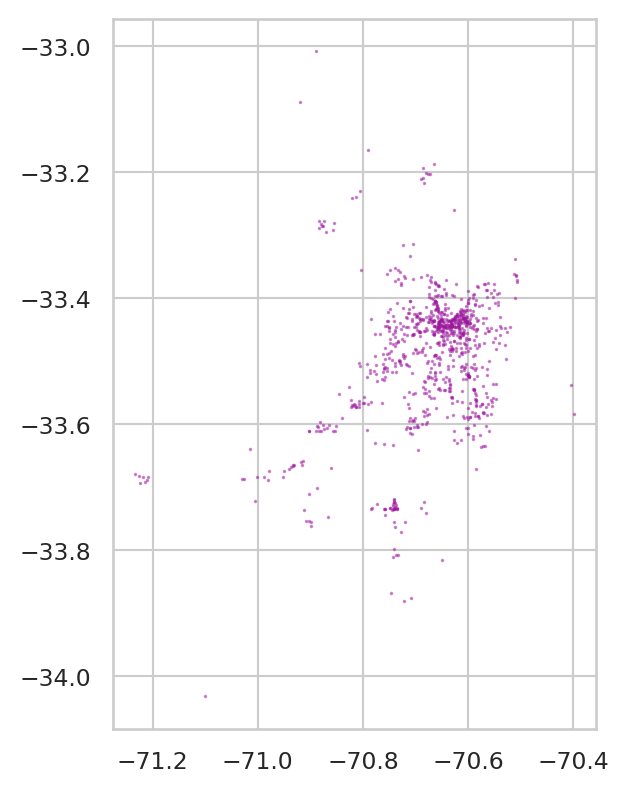

In [1203]:
origenes_viajes.plot(markersize=1, marker='.', alpha=0.5)

In [1204]:
origenes_viajes.columns

Index(['FID', 'POINT_X', 'POINT_Y', 'REGION', 'COD_COMUN', 'COMUNA',
       'CALLE_UNO', 'CALLE_DOS', 'NUMERO', 'DIR_GEOCOD', 'PAIS', 'TIPO', 'Año',
       'Claseaccid', 'Cód_Regi', 'Cód_Zona', 'Zona', 'Cód_Calle', 'Fallecidos',
       'Graves', 'Menos_Grav', 'Leves', 'Ilesos', 'Siniestros', 'geometry',
       'Gravedad'],
      dtype='object')

In [1205]:
zones = (
    gpd.read_file(PROCESSED_PATH / "scl_zonas_urbanas.json")
    .set_index("ID")
    .to_crs(origenes_viajes.crs)
)
zones.head()


,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
ID,,,,,,,,,,,,,,,,,
103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((-70.65492 -33.55500, -70.65517 -33.5..."
104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((-70.67599 -33.55542, -70.67452 -33.5..."
106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((-70.67891 -33.55911, -70.68019 -33.5..."
115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((-70.67625 -33.55513, -70.67653 -33.5..."
116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((-70.66564 -33.55260, -70.66309 -33.5..."


<Axes: >

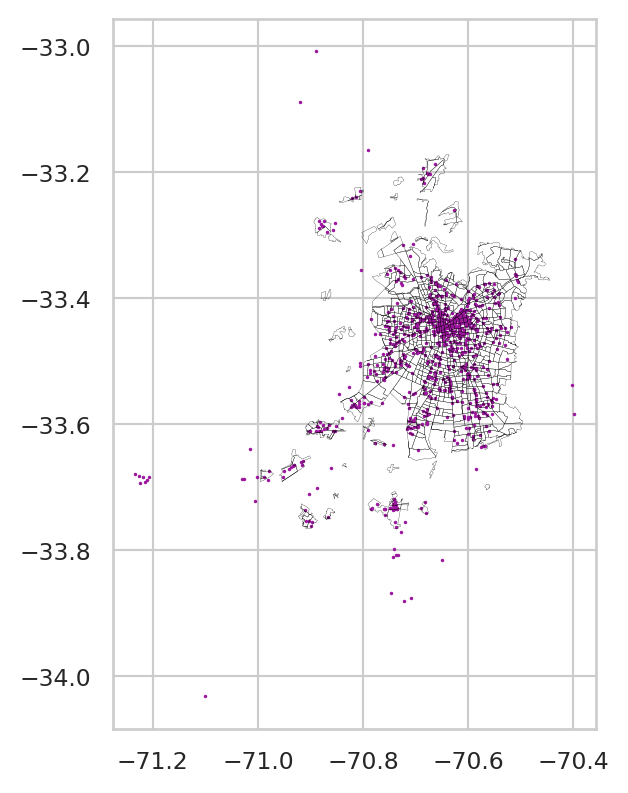

In [1206]:
ax = origenes_viajes.plot(marker='.', markersize=1)
zones.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.1)

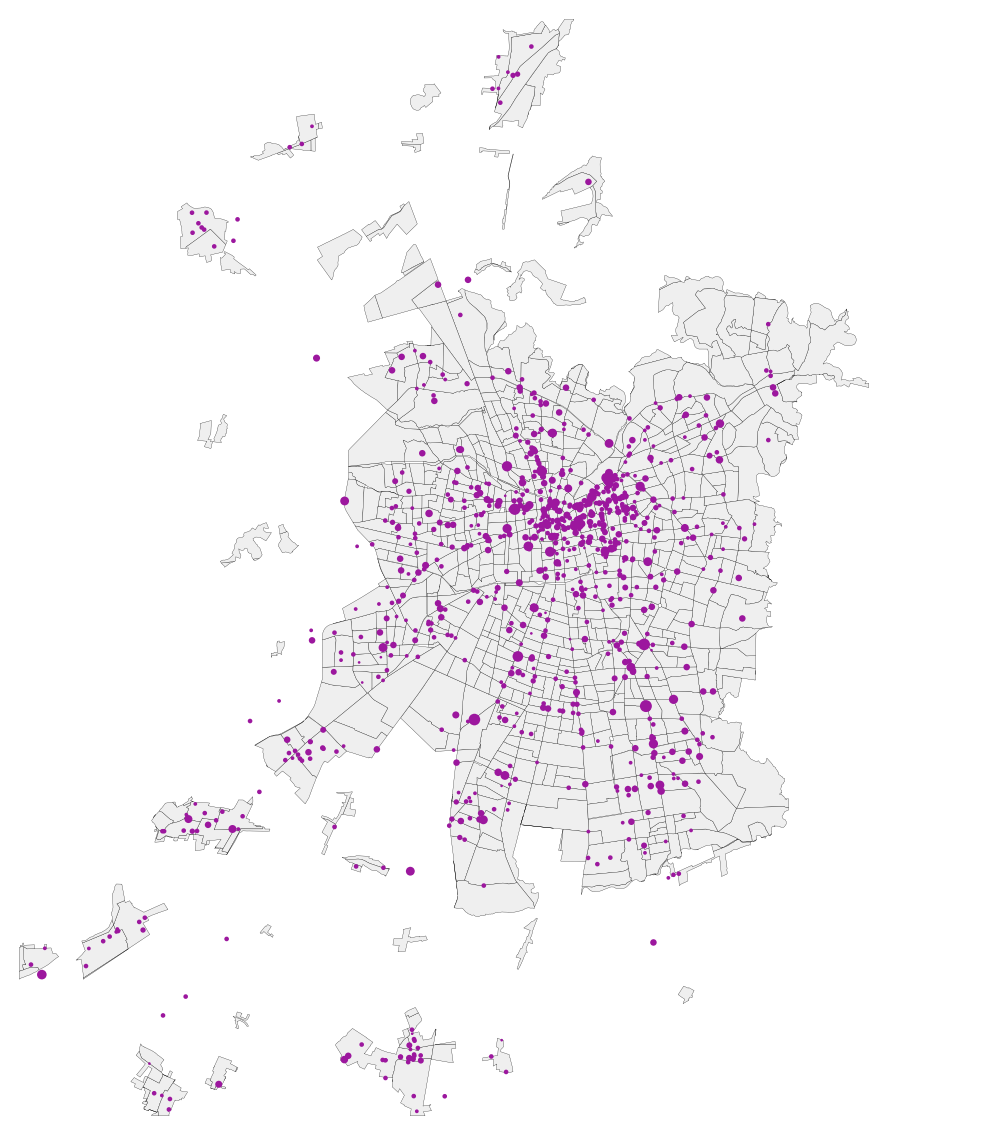

In [1207]:
from aves.visualization.figures import GeoFacetGrid
from aves.visualization.maps import bubble_map

grid = GeoFacetGrid(
    # los datos
    origenes_viajes,
    # el contexto geográfico. es opcional, se utiliza para configurar el gráfico
    context=zones,
    # la altura del gráfico
    height=6,
)

# visualizamos el contexto
grid.add_layer(zones, color="#efefef", edgecolor="black", linewidth=0.1)

# agregamos los bubble_map correspondientes
grid.add_layer(bubble_map, size="Gravedad", scale=1, edgecolor='none')

# agregamos la leyenda
grid.add_legend()

grid.fig.tight_layout()

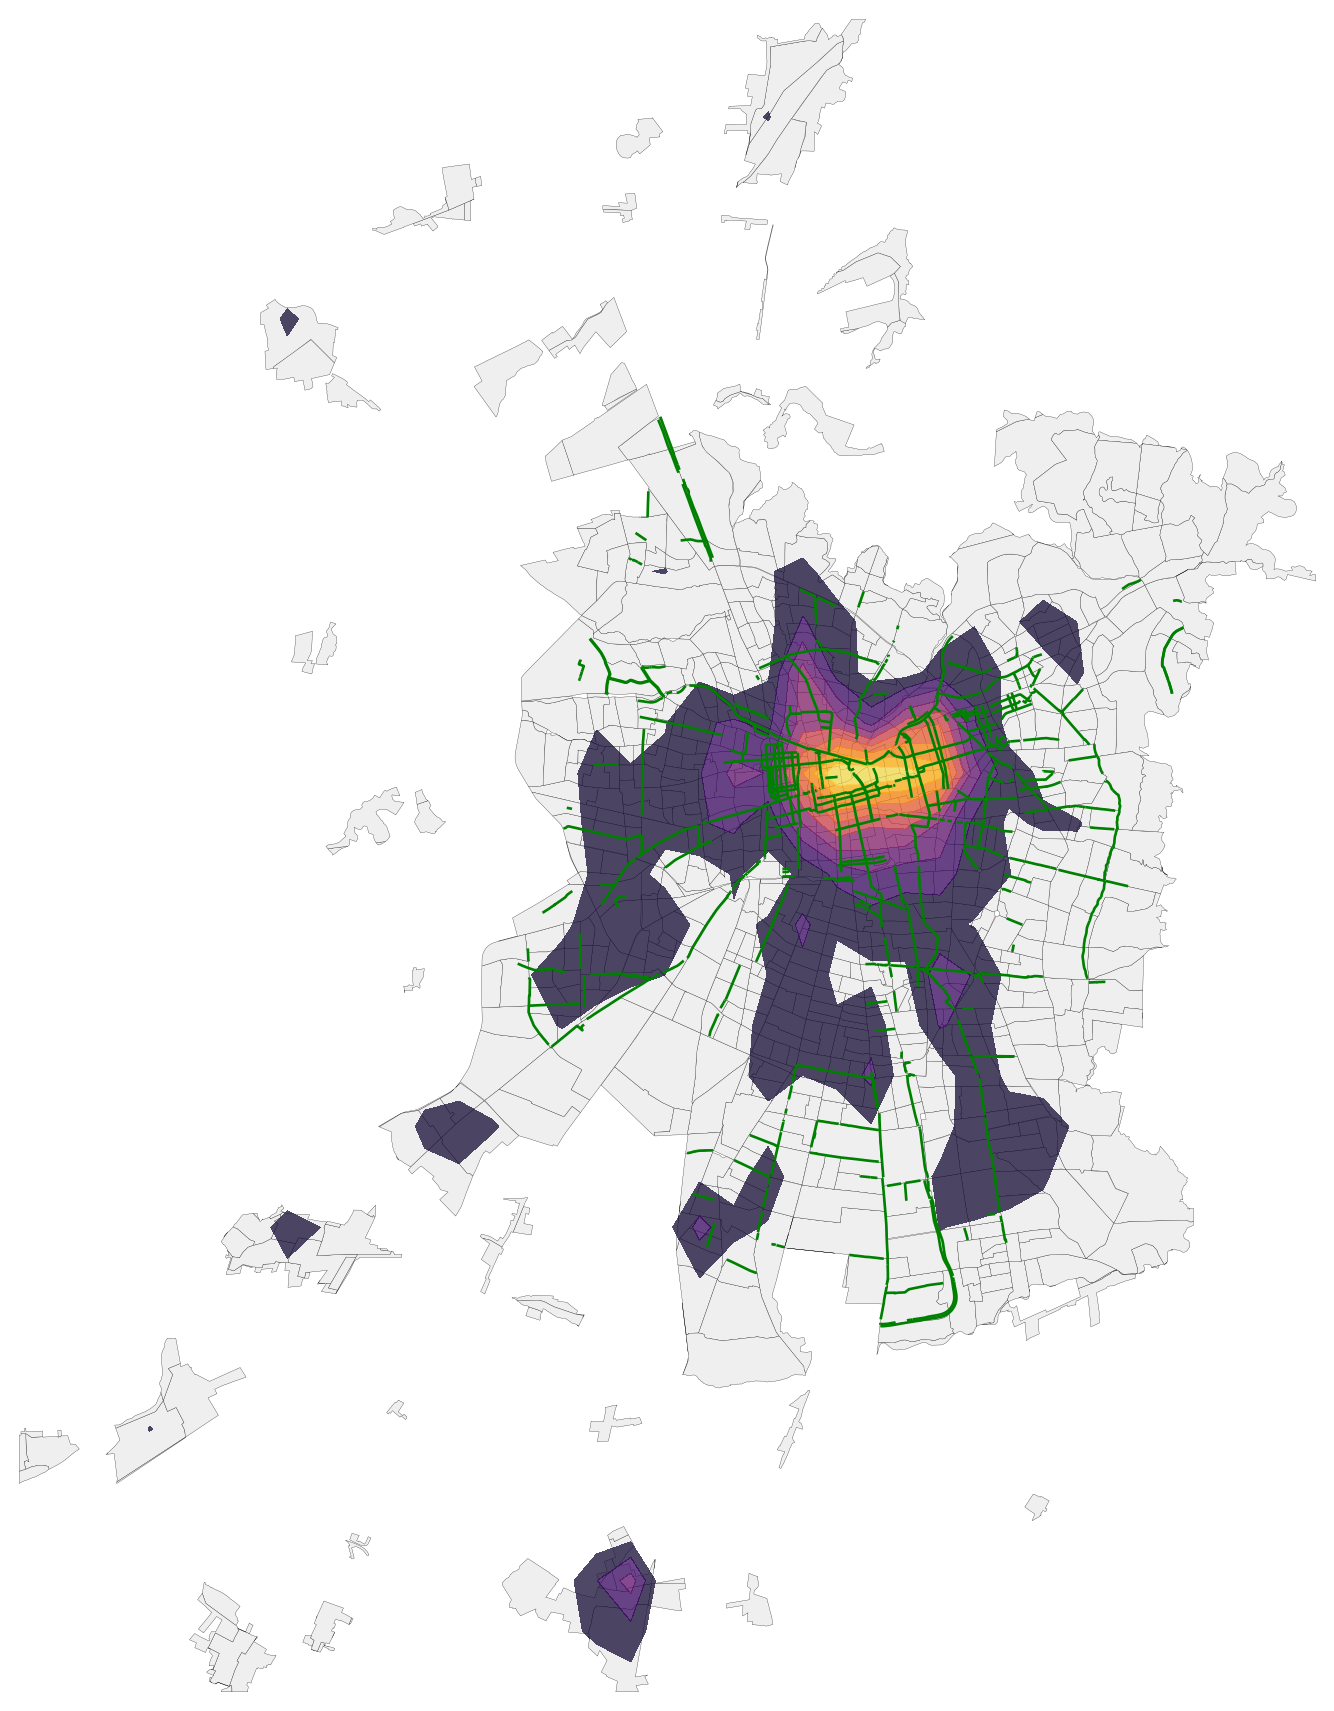

In [1208]:
from aves.visualization.maps import heat_map


grid = GeoFacetGrid(
    origenes_viajes,
    context=zones,
    height=9,
)



grid.add_layer(zones, color="#efefef", edgecolor="black", linewidth=0.1)



grid.add_layer(
    heat_map,
    # atributo de los datos con la importancia o peso de cada viaje
    # cantidad de niveles/colores del mapa de calor
    n_levels=10,
    # radio de influencia de cada viaje
    bandwidth=0.000000001,
    # valor de corte para los valores bajos del heatmap
    low_threshold=0.1,
    # transparencia
    alpha=0.75,
    # paleta de colores
    palette="inferno"
)

grid.add_layer(ciclovias_2021, edgecolor='green', facecolor='none', linewidth=1)



Se busca los puntos más específicos en donde ocurren los accidentes más graves

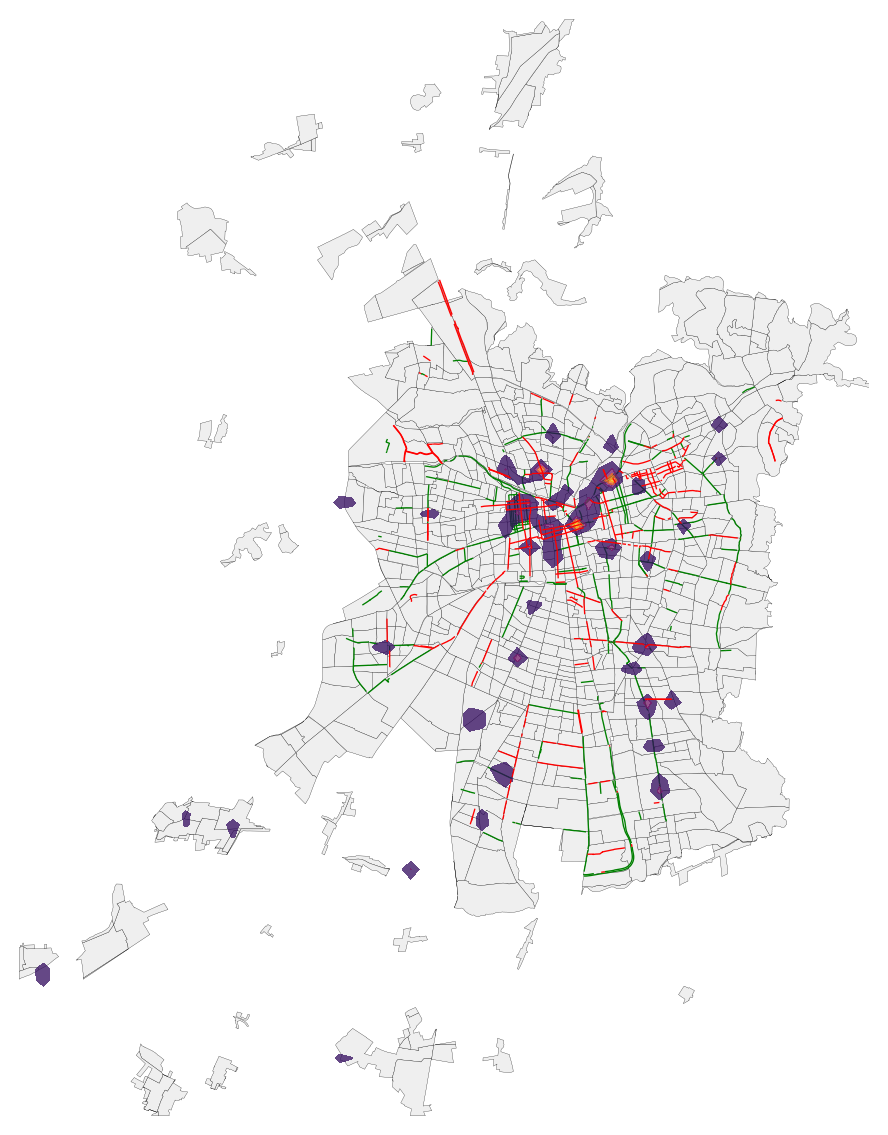

In [1209]:
from aves.visualization.maps import heat_map
from aves.visualization.figures import GeoFacetGrid

grid = GeoFacetGrid(
    origenes_viajes[origenes_viajes.Gravedad > 7],
    context=zones,
    height=6,
)

grid.add_layer(zones, color="#efefef", edgecolor="black", linewidth=0.1)


#estados: Singularid y Recomendad
grid.add_layer(ciclovias_2021[ciclovias_2021["Singularid"] == "Aprobado"] ,edgecolor='green', facecolor='none', linewidth=0.5)
grid.add_layer(ciclovias_2021[ciclovias_2021["Singularid"] == "Reprobado"] ,edgecolor='red', facecolor='none', linewidth=0.5)

grid.add_layer(
    heat_map,
    # atributo de los datos con la importancia o peso de cada viaje
    weight="Gravedad",
    # cantidad de niveles/colores del mapa de calor
    n_levels=5,
    # radio de influencia de cada viaje
    bandwidth=0.000000001,
    # valor de corte para los valores bajos del heatmap
    low_threshold=0.1,
    # transparencia
    alpha=0.75,
    # paleta de colores
    palette="inferno"
)

Se decide medir como se relaciona la riqueza de una comuna con la calidad de las ciclovías. Primero se limpian las tablas de comunas en la tabla de ciclovías y de hogares.

In [1210]:
# hogares are read
hogares = eod.read_homes(EOD_PATH)

# Dictionary of replacements
replacements = {
    'á': 'a',
    'é': 'e',
    'í': 'i',
    'ó': 'o',
    'ú': 'u',
    'Á': 'A',
    'É': 'E',
    'Í': 'I',
    'Ó': 'O',
    'Ú': 'U'
}

ciclovias_2021_copy = ciclovias_2021
hogares_copy = hogares

# Function to replace accented characters
def remove_accents(df, column):
    for accented_char, replacement_char in replacements.items():
        df[column] = df[column].str.replace(accented_char, replacement_char)
    return df

# all elements of the column Comuna in ciclovias_2021 have the tldes removed
ciclovias_2021_copy = remove_accents(ciclovias_2021_copy, "COMUNA")

# drop all rows in hogares that have a value of Comuna that is not in ciclovias_2021
hogares_copy = hogares_copy[hogares_copy["Comuna"].isin(ciclovias_2021_copy["COMUNA"])]

# # rename the column COMUNA to Comuna in ciclovias_2021
# ciclovias_2021 = ciclovias_2021.rename(columns={"COMUNA": "Comuna"})

# the values in the collumn Shape_Leng are transformed fromt float to int
ciclovias_2021_copy["Shape_Leng"] = ciclovias_2021_copy["Shape_Leng"].astype(int)


Ahora, se eliminan las columnas que no se utilizarán en ambos dataframes.

In [1211]:
# drop the Singularid, FID, OBJECTID, SIngularid, Shape__Length columns in ciclovias_2021_copy
ciclovias_2021_copy = ciclovias_2021_copy.drop(columns=["Singularid", "FID", "OBJECTID", "Shape__Length"])

# drop the Sector, DirCoordX, DirCoordY, Fecha, DiaAsig, TipoDia, Temporada, NumVeh, NumBicAdulto, NumBicNino, Propiedad, MontoDiv, ImputadoDiv, MontoArr, ImputadoArr collum in hogares_copy
hogares_copy = hogares_copy.drop(columns=["Sector", "DirCoordX", "DirCoordY", "Fecha", "DiaAsig", "TipoDia", "Temporada", "NumVeh", "NumBicAdulto", "NumBicNino", "Propiedad", "MontoDiv", "ImputadoDiv", "MontoArr", "ImputadoArr"])


In [1212]:
# a new dataframe is created, with a collumn named Total_Length, that is the sum of the lenght of all the ciclovias in each comuna

ciclovias_2021_copy_length =  ciclovias_2021_copy.groupby("COMUNA").agg({"Shape_Leng": "sum"}).reset_index().rename(columns={"Shape_Leng": "Total_Length"})

# a collumn named Rejected_Length is added to ciclovias_2021_copy_length, using all the rows that have the value "Reprobado" in the column Recomendad in ciclovias_2021_copy
ciclovias_2021_copy_length["Rejected_Length"] = ciclovias_2021_copy[ciclovias_2021_copy["Recomendad"] == "Reprobado"].groupby("COMUNA").agg({"Shape_Leng": "sum"}).reset_index()["Shape_Leng"]

# a collumn named Approved_Length is added to ciclovias_2021_copy_length, using the difference between the Total_Length and the Rejected_Length
ciclovias_2021_copy_length["Approved_Length"] = ciclovias_2021_copy_length["Total_Length"] - ciclovias_2021_copy_length["Rejected_Length"]

# the colluns Approved_Length and Rejected_Length are change their position
ciclovias_2021_copy_length = ciclovias_2021_copy_length[["COMUNA", "Total_Length", "Approved_Length", "Rejected_Length"]]

# a collumn named Aproved_Length_Percent is added to ciclovias_2021_copy_length, that is a number between 0 and 1, that represents the percentage of the ciclovias in each comuna that are approved
ciclovias_2021_copy_length["Approved_Length_Percent"] = ciclovias_2021_copy_length["Approved_Length"] / ciclovias_2021_copy_length["Total_Length"]

# a collumn named Rejected_Length_Percent is added to ciclovias_2021_copy_length, that is a number between 0 and 1, that represents the percentage of the ciclovias in each comuna that are rejected
ciclovias_2021_copy_length["Rejected_Length_Percent"] = ciclovias_2021_copy_length["Rejected_Length"] / ciclovias_2021_copy_length["Total_Length"]

Text(0, 0.5, 'Longitud de Ciclovías (U.A.)')

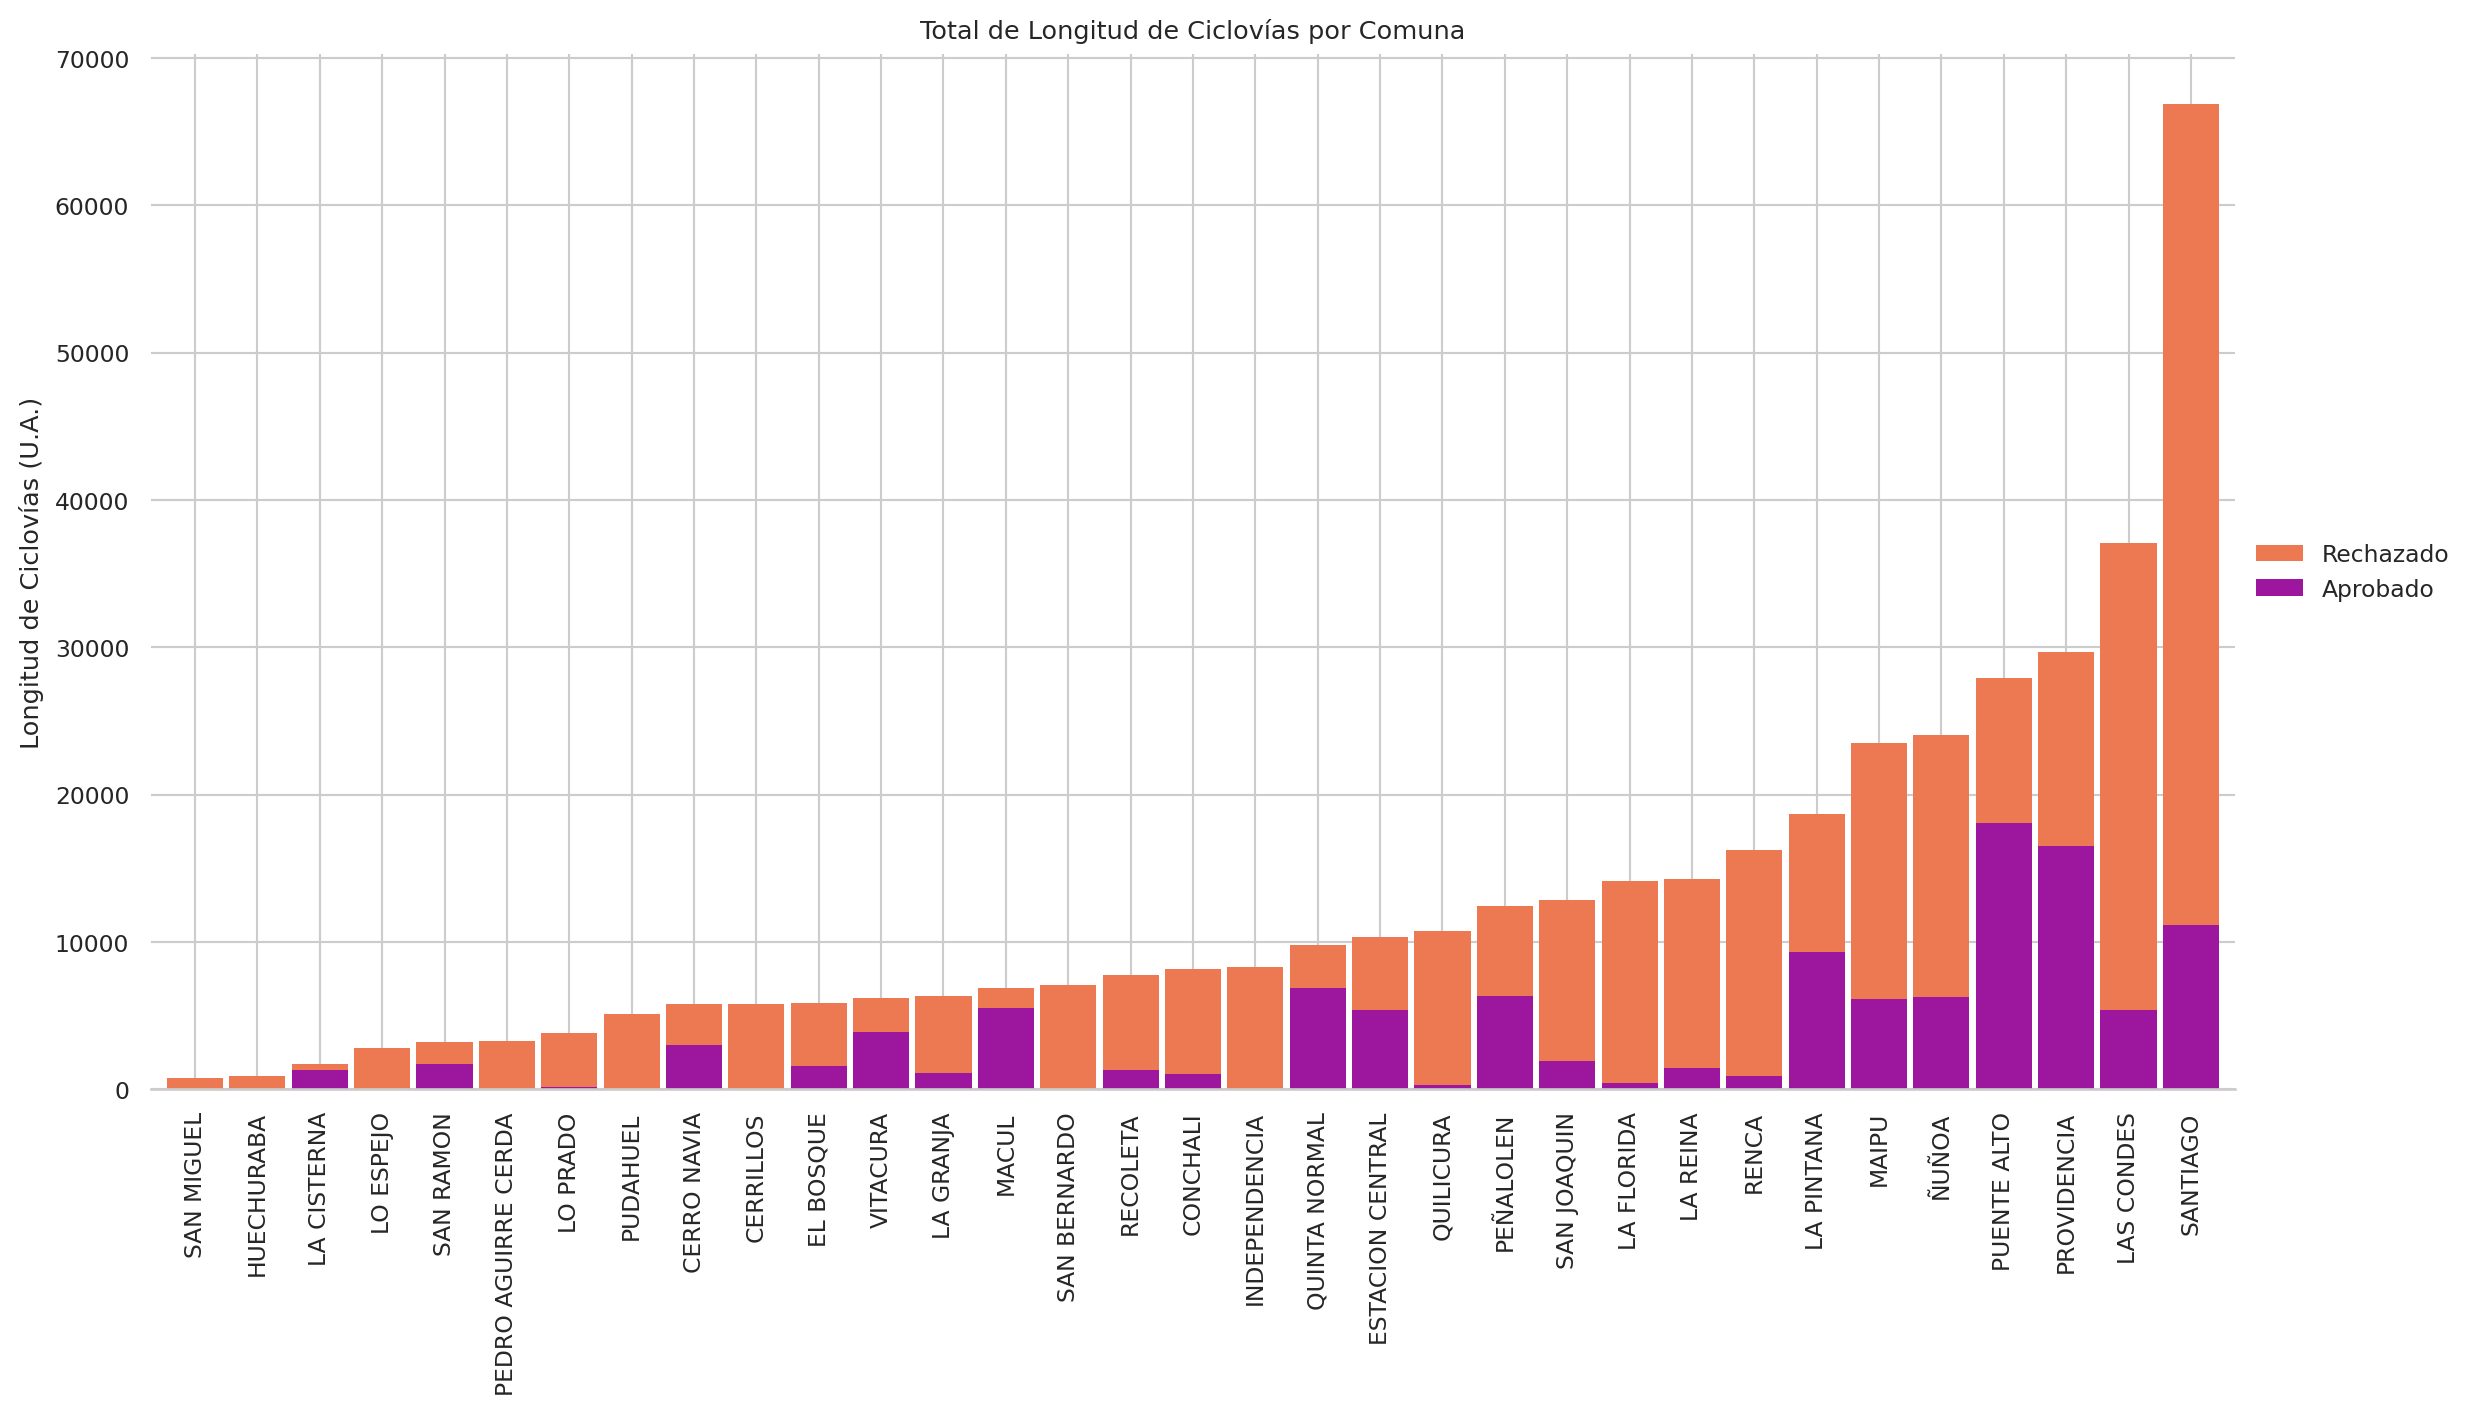

In [1213]:
from aves.visualization.tables import barchart

fig, ax = plt.subplots(figsize=(14, 7))

# the COMUNA values are ordered by Total_Length
ciclovias_2021_copy_length = ciclovias_2021_copy_length.sort_values(by="Total_Length", ascending=True)
# dataframe with the comuna and the aproved and rejected length of the ciclovias
ciclovias_2021_aproved_rejected = ciclovias_2021_copy_length[["COMUNA", "Approved_Length", "Rejected_Length"]]
# COMUNA renamed to Comuna
ciclovias_2021_aproved_rejected = ciclovias_2021_aproved_rejected.rename(columns={"COMUNA": "Comuna"})
# Aproved_Length renamed to Aprobado
ciclovias_2021_aproved_rejected = ciclovias_2021_aproved_rejected.rename(columns={"Approved_Length": "Aprobado"})
# Rejected_Length renamed to Rechazado
ciclovias_2021_aproved_rejected = ciclovias_2021_aproved_rejected.rename(columns={"Rejected_Length": "Rechazado"})
# Turn Comuna into the index of the dataframe
ciclovias_2021_aproved_rejected = ciclovias_2021_aproved_rejected.set_index("Comuna")

barchart(
    ax,
    ciclovias_2021_aproved_rejected,
    [ "Aprobado", "Rechazado"],
    stacked=True,
)

ax.set_title("Total de Longitud de Ciclovías por Comuna")
ax.set_xlabel("")
ax.set_ylabel("Longitud de Ciclovías (U.A.)")

Text(0, 0.5, 'Porcentaje aprobado de ciclovía')

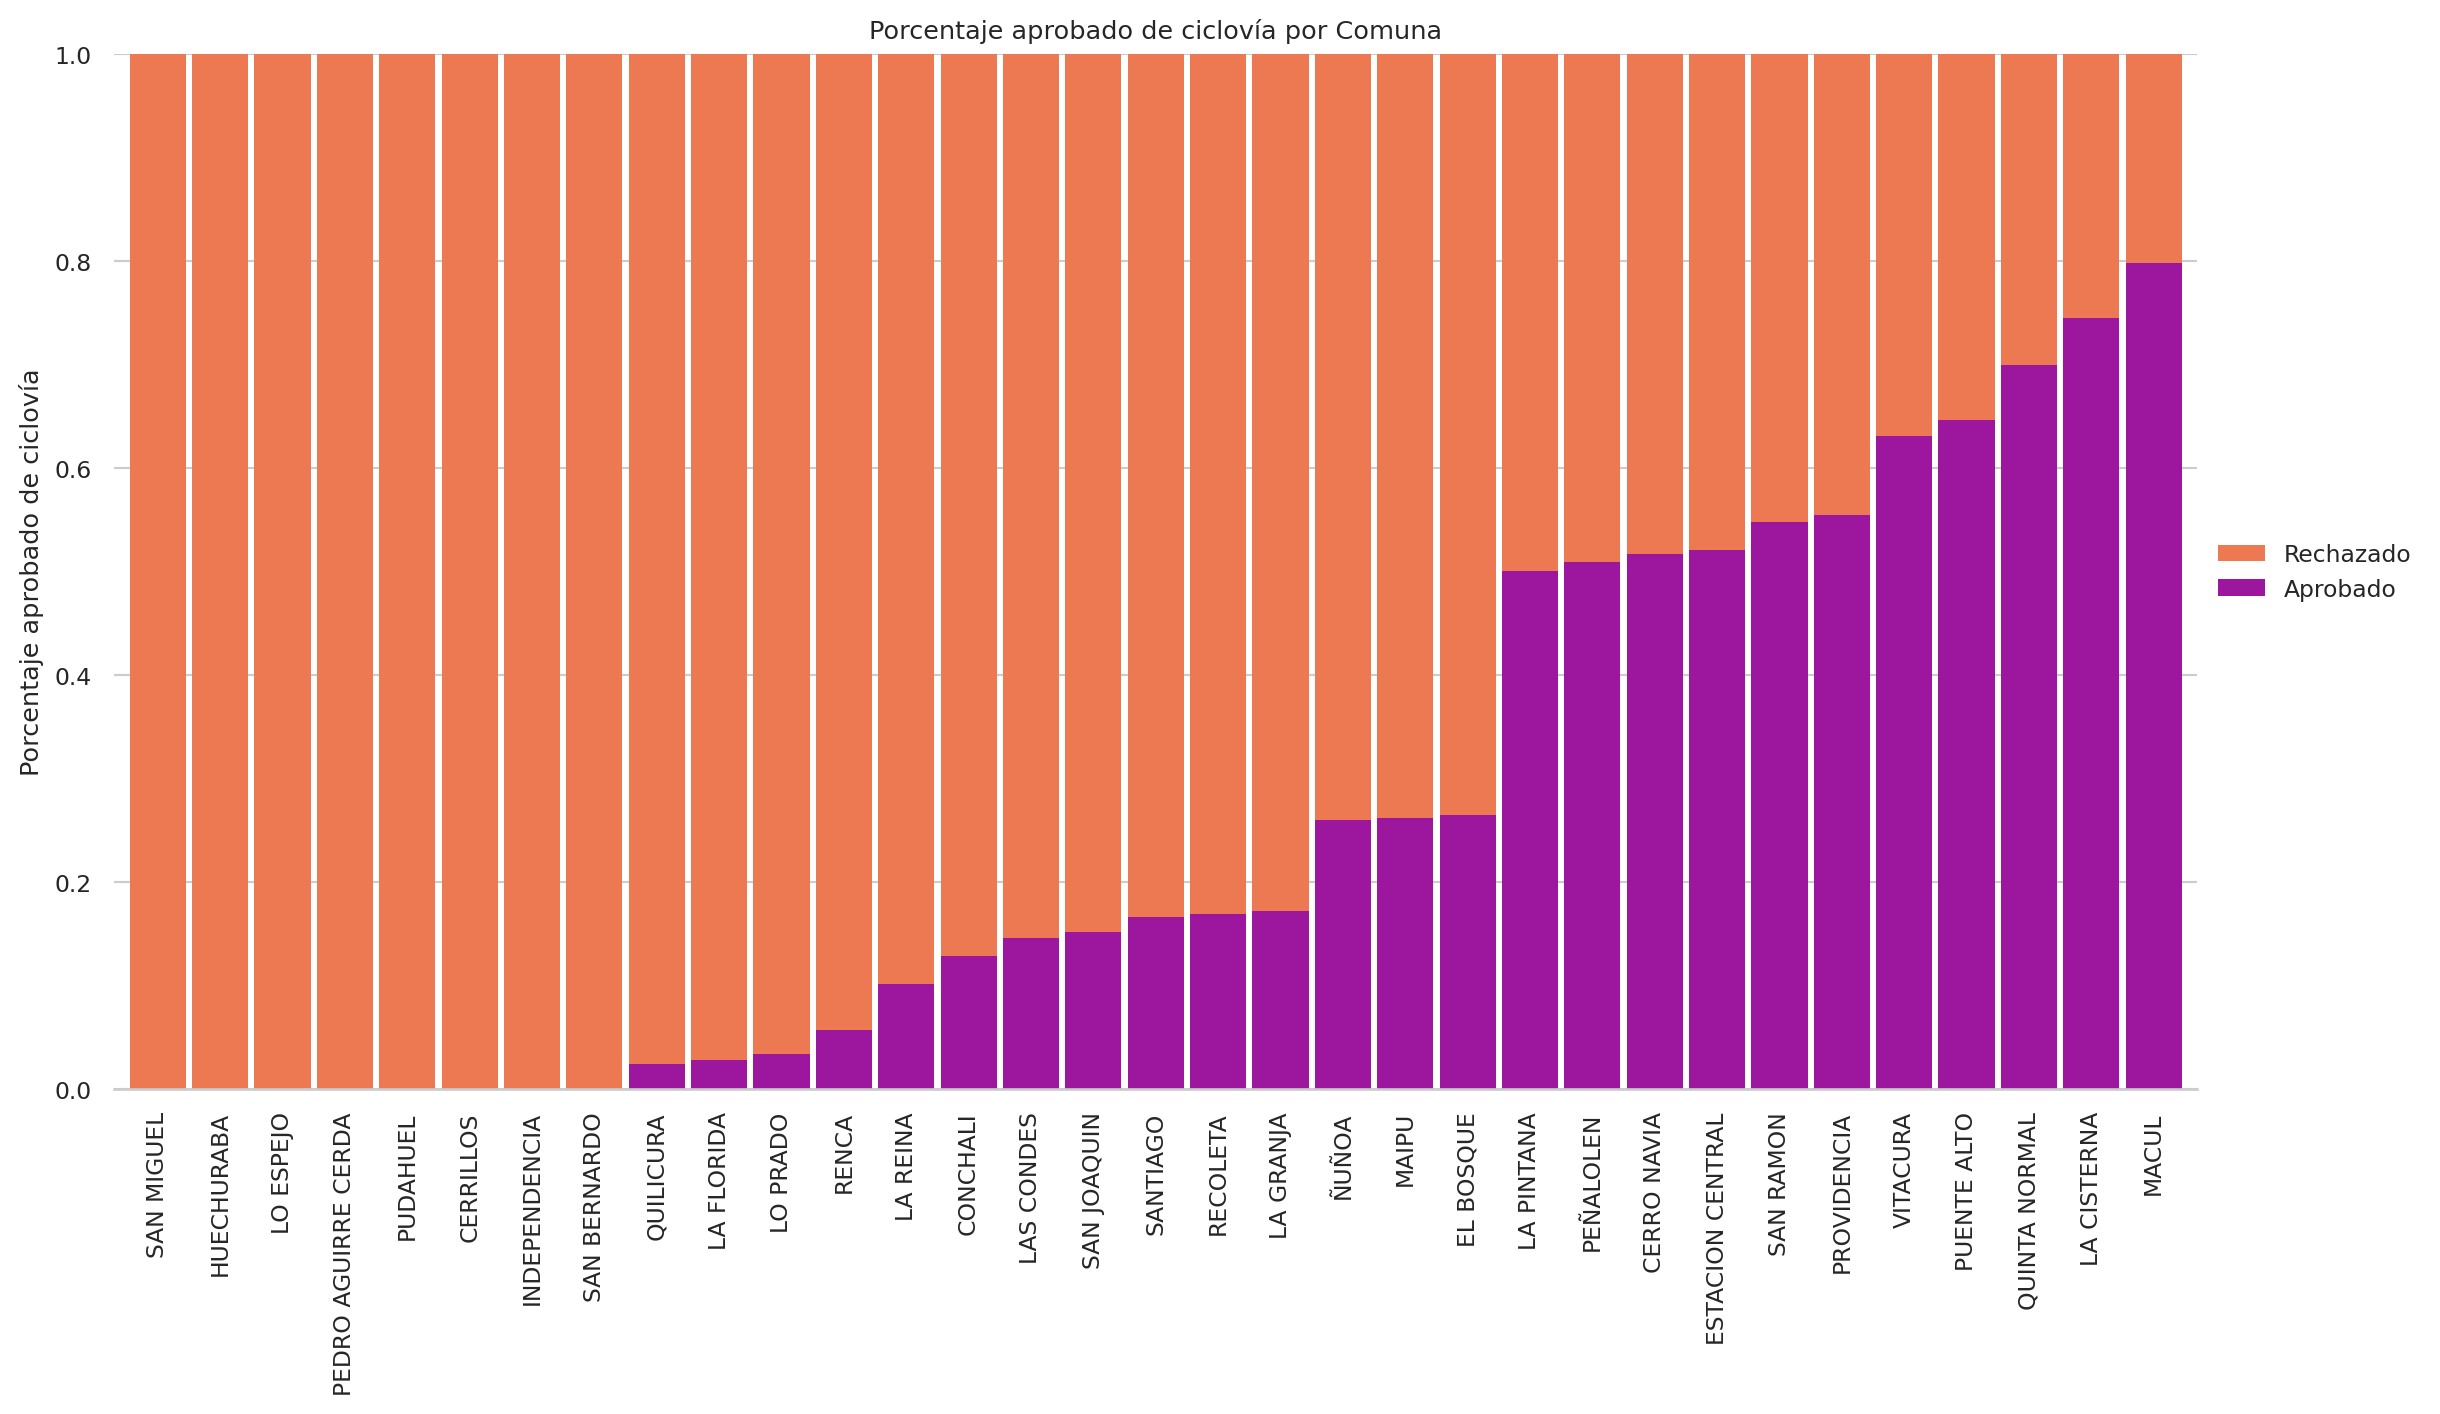

In [1214]:
from aves.visualization.tables import barchart

fig, ax = plt.subplots(figsize=(14, 7))

# dataframe with the comuna and the aproved and rejected length of the ciclovias
ciclovias_2021_aproved_rejected = ciclovias_2021_copy_length[["COMUNA", "Approved_Length_Percent", "Rejected_Length_Percent"]]
# COMUNA renamed to Comuna
ciclovias_2021_aproved_rejected = ciclovias_2021_aproved_rejected.rename(columns={"COMUNA": "Comuna"})
# Aproved_Length renamed to Aprobado
ciclovias_2021_aproved_rejected = ciclovias_2021_aproved_rejected.rename(columns={"Approved_Length_Percent": "Aprobado"})
# Rejected_Length renamed to Rechazado
ciclovias_2021_aproved_rejected = ciclovias_2021_aproved_rejected.rename(columns={"Rejected_Length_Percent": "Rechazado"})
# Turn Comuna into the index of the dataframe
ciclovias_2021_aproved_rejected = ciclovias_2021_aproved_rejected.set_index("Comuna")

barchart(
    ax,
    ciclovias_2021_aproved_rejected,
    [ "Aprobado", "Rechazado"],
    normalize=True,
    sort_items=True,
    stacked=True,
)

ax.set_title("Porcentaje aprobado de ciclovía por Comuna")
ax.set_xlabel("")
ax.set_ylabel("Porcentaje aprobado de ciclovía")

Ahora, se procedera a calcular los ingresos por cada comuna de Santiago.

In [1215]:
# a new Collumn named IngresoRepresentado is added to hogares_copy, that is the product of the FactorHogar and IngresoHogar
hogares_copy["IngresoRepresentado"] = hogares_copy["FactorHogar"] * hogares_copy["IngresoHogar"]
# IngresaRepresentado is turned from float64 to int64
hogares_copy["IngresoRepresentado"] = hogares_copy["IngresoRepresentado"].astype(int)

# a new dataframe is created, name comuna_ingresos, that is the sum of the IngresoRepresentado by comuna
comuna_ingresos = hogares_copy.groupby("Comuna").agg({"IngresoRepresentado": "sum"}).reset_index()

# add a collumn named IngresoRepresentadoPromedio, that is the IngresoRepresentado divided by the sum of the FactorHogar by comuna
comuna_ingresos["IngresoRepresentadoPromedio"] = comuna_ingresos["IngresoRepresentado"] / hogares_copy.groupby("Comuna").agg({"FactorHogar": "sum"}).reset_index()["FactorHogar"]
# turn IngresoRepresentadoPromedio from float64 to int64
comuna_ingresos["IngresoRepresentadoPromedio"] = comuna_ingresos["IngresoRepresentadoPromedio"].astype(int)

# order by IngresoRepresentadoPromedio
comuna_ingresos = comuna_ingresos.sort_values(by="IngresoRepresentadoPromedio", ascending=True)

Text(0, 0.5, 'Ingreso en CLP')

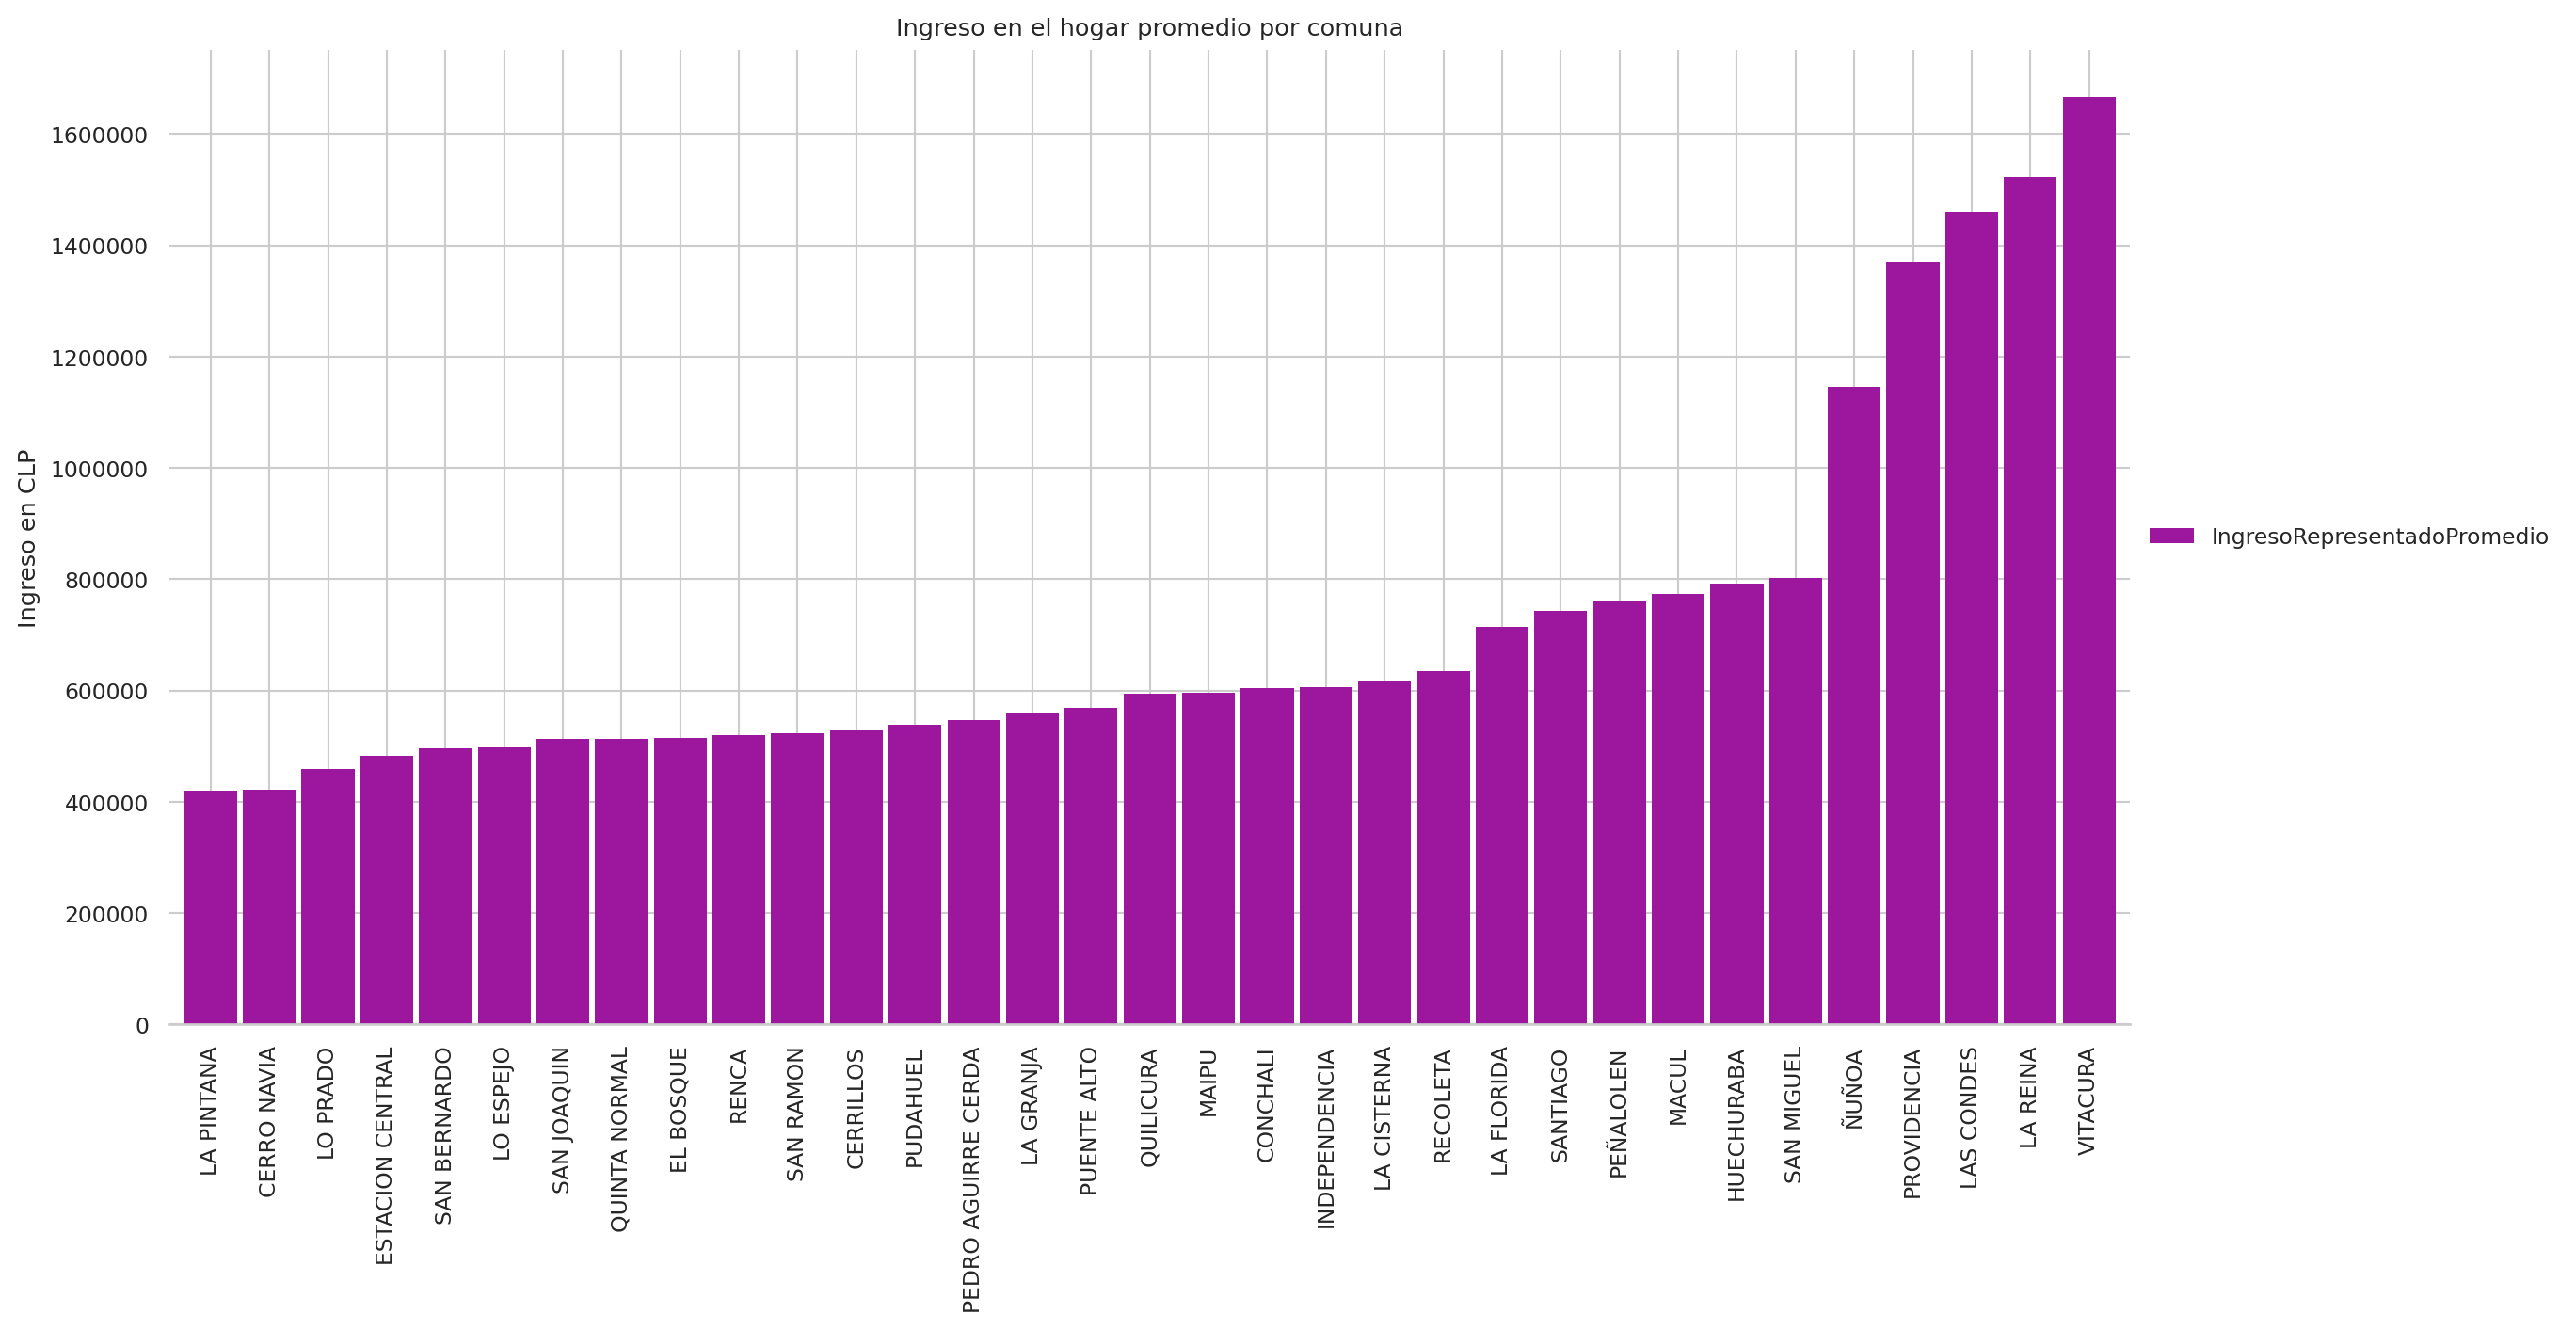

In [1216]:
from aves.visualization.tables import barchart

fig, ax = plt.subplots(figsize=(14, 7))

# set index Comuna
comuna_ingresos = comuna_ingresos.set_index("Comuna")

barchart(
    ax,
    comuna_ingresos,
    [ "IngresoRepresentadoPromedio"],
    sort_items=True,
)



ax.set_title("Ingreso en el hogar promedio por comuna")
ax.set_xlabel("")
ax.set_ylabel("Ingreso en CLP")

Ahora, se mide la correlación entre ingreso promedio del hogar, con el porcentaje de ciclovía aprobado y la cantidad de ciclovía construída.

In [1217]:
# rename the column COMUNA to Comuna in ciclovias_2021_copy_length
ciclovias_2021_copy_length = ciclovias_2021_copy_length.rename(columns={"COMUNA": "Comuna"})

# ciclovias_2021_copy_length is merged with comuna_ingresos
ciclovias_2021_length_ingresos = ciclovias_2021_copy_length.merge(comuna_ingresos, on="Comuna")

# correlation between IngresoRepresentadoPromedio and Approved_Length_Percent
ingreso_aproved_percent_corr = ciclovias_2021_length_ingresos[["IngresoRepresentadoPromedio", "Approved_Length_Percent"]].corr()

# correlation between IngresoRepresentadoPromedio and Total_Length
ingreso_total_length_corr = ciclovias_2021_length_ingresos[["IngresoRepresentadoPromedio", "Total_Length"]].corr()


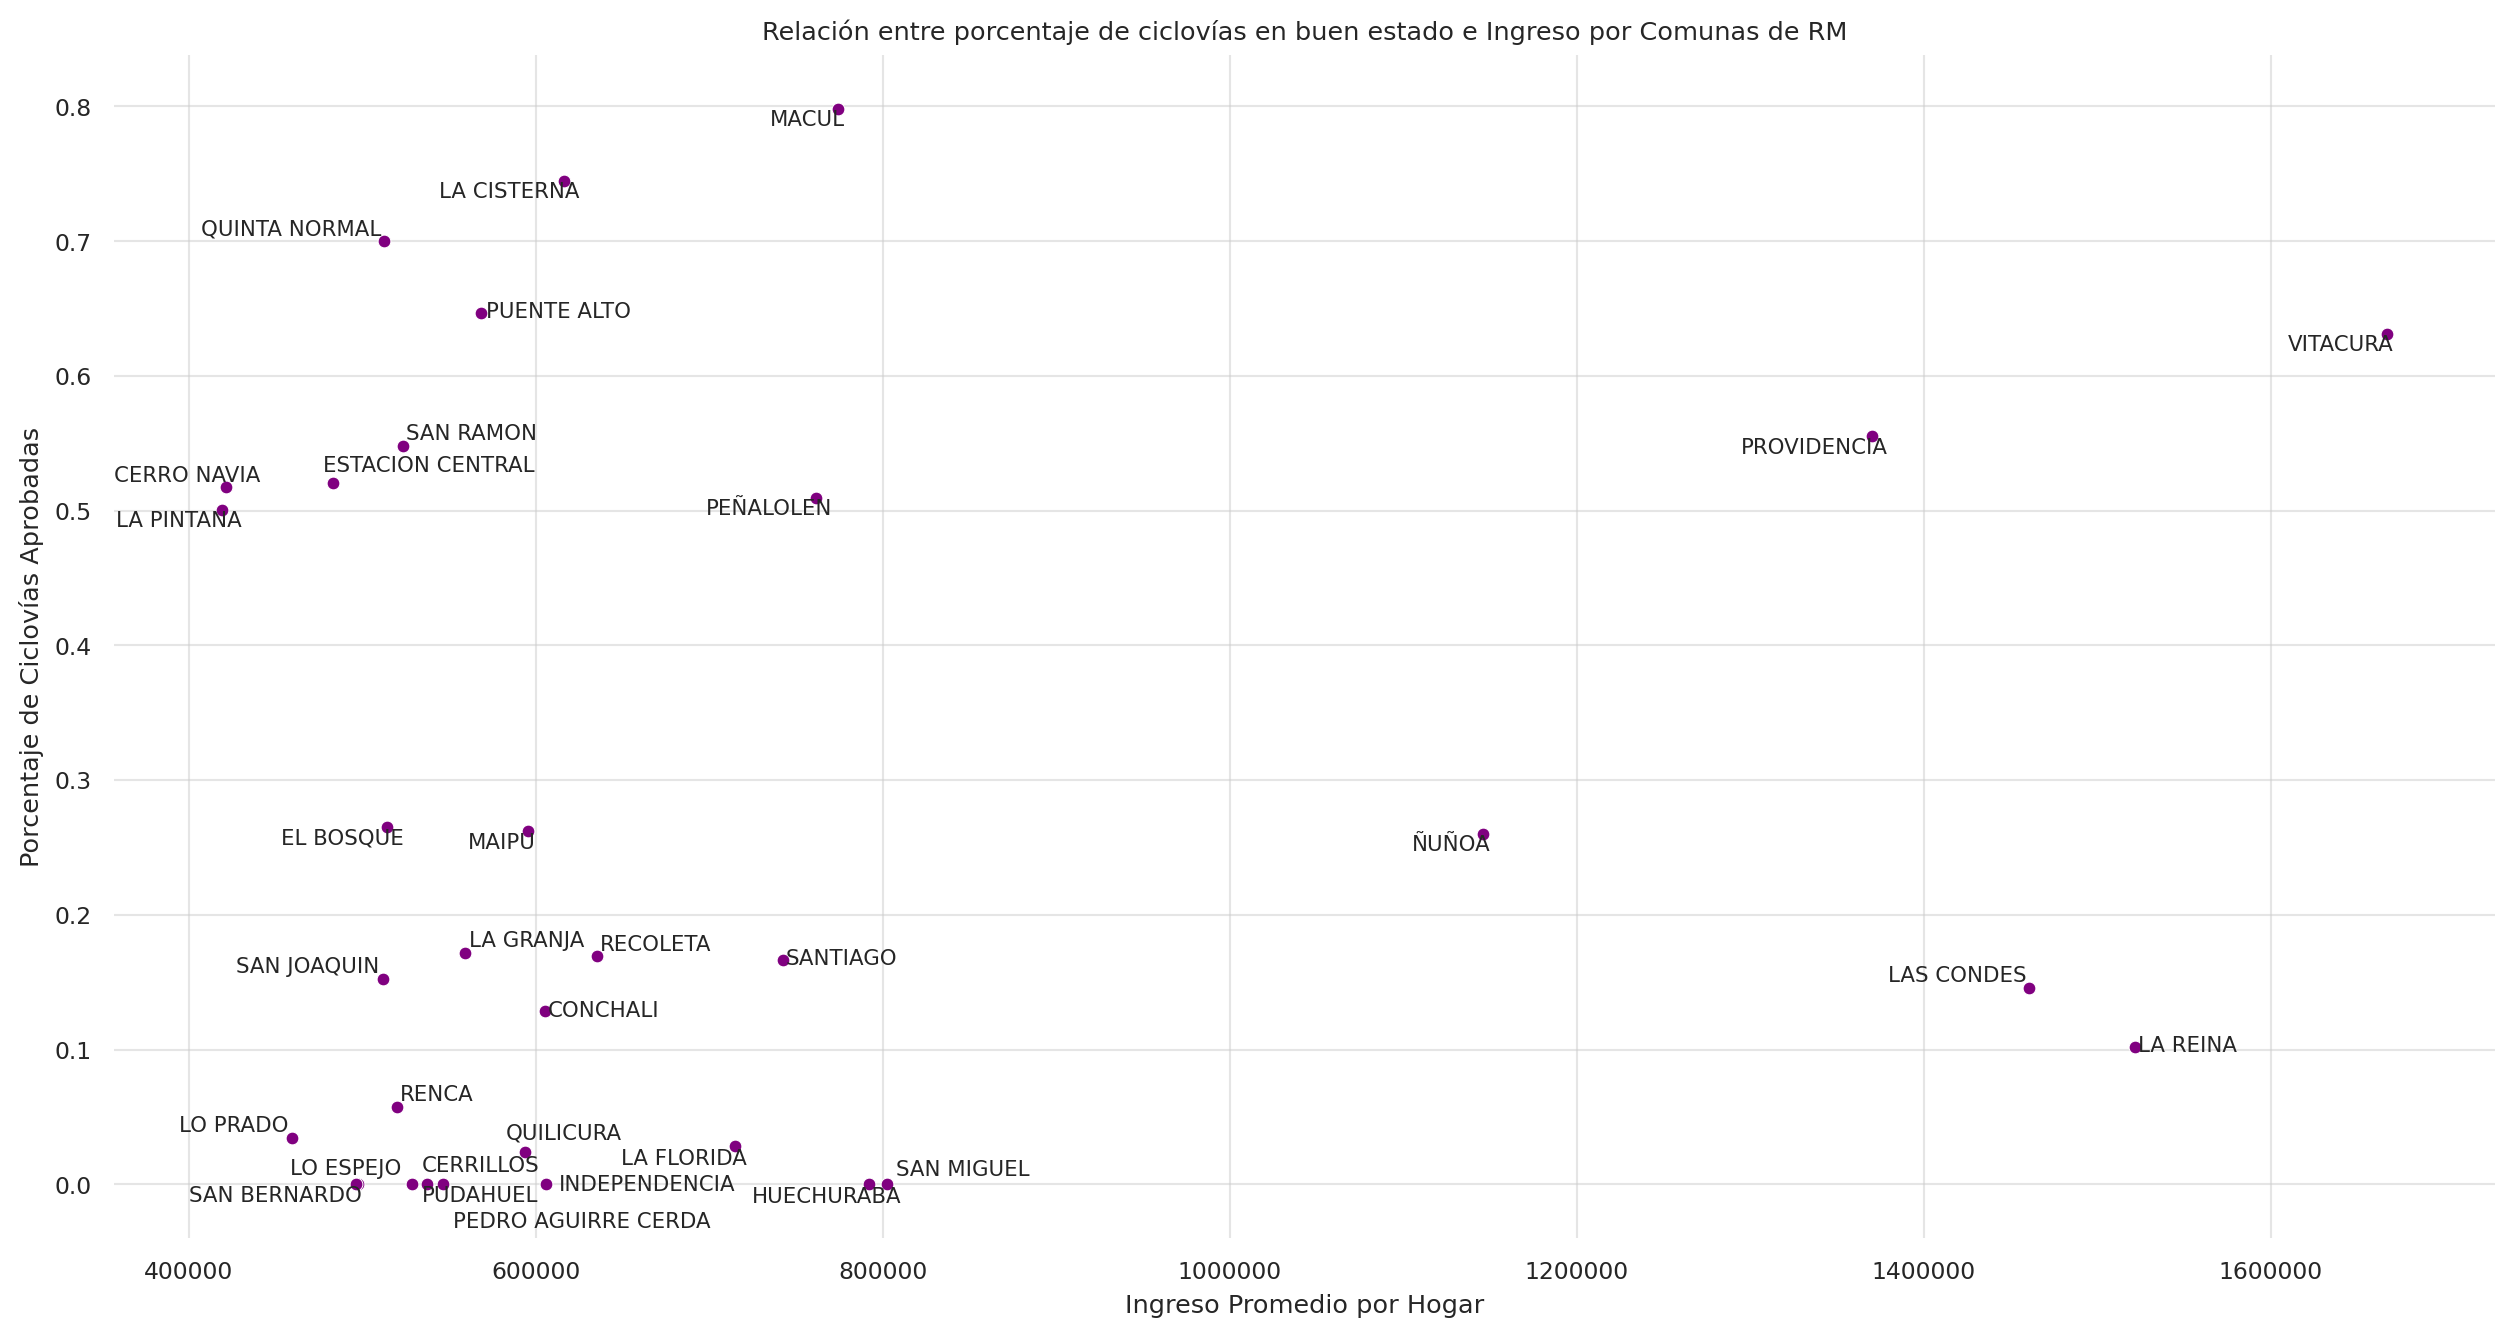

In [1225]:
from aves.visualization.tables import scatterplot

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

ciclovias_2021_porcentaje_ingresos = ciclovias_2021_length_ingresos[["Comuna","Approved_Length_Percent", "IngresoRepresentadoPromedio"]]
# set index Comuna
ciclovias_2021_porcentaje_ingresos = ciclovias_2021_porcentaje_ingresos.set_index("Comuna")

scatterplot(
    ax,
    ciclovias_2021_porcentaje_ingresos,
    "IngresoRepresentadoPromedio",
    "Approved_Length_Percent",
    annotate=True,
    avoid_collisions=True,
    label_args=dict(fontsize="small"),
    scatter_args=dict(color="purple"),
)

ax.set_xlabel("Ingreso Promedio por Hogar")
ax.set_ylabel("Porcentaje de Ciclovías Aprobadas")
ax.set_title(
    "Relación entre porcentaje de ciclovías en buen estado e Ingreso por Comunas de RM"
)
ax.grid(alpha=0.5)
ax.ticklabel_format(style="plain")

sns.despine(ax=ax, left=True, bottom=True, right=True, top=True)

<Axes: xlabel='IngresoRepresentadoPromedio', ylabel='Total_Length'>

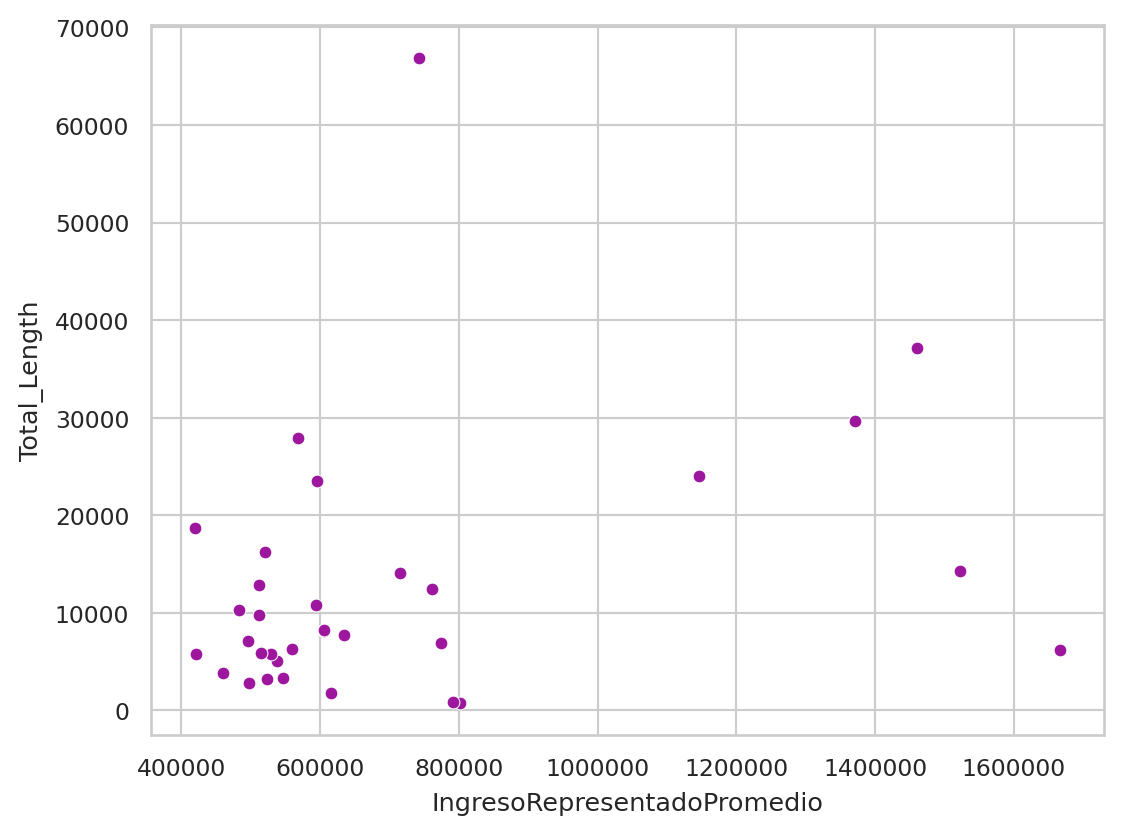

In [1168]:
# plot the correlation between IngresoRepresentadoPromedio and Total_Length
sns.scatterplot(data=ciclovias_2021_length_ingresos, x="IngresoRepresentadoPromedio", y="Total_Length")